<a href="https://colab.research.google.com/github/srivatsakr21/siemens-sustainability-challenge/blob/main/Company_wide_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import the libraries**

In [1]:
import pandas as pd

In [5]:
pd.set_option('display.max_colwidth', None)

## **Read the data**
The data has been scapred from the .docx files provided to us. We have scraped the details regarding the company, its sustainabilty goals and sustainability actions.
 

In [2]:
data = pd.read_csv('ESR_data.tsv', sep='\t', error_bad_lines=False)

In [3]:
data = data.drop('News', axis=1)

In [6]:
data

Company  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Sustainability Report Highlights
0            Amazon  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Became world’s largest corporate purchaser of renewable energy and achieved 65% renewable energy across global operations (2019 baseline of 42%), putting it on the path to 100% by 2025, 5 years ahead of its original target As of June 2021, has 232 wind and solar projects globally with 10 gigawatts of electricity production capacity Lowered its carbon intensity by 16% (2019 baseline) As of June 2021, reduced the weight of outbound packaging by over 36%,eliminating a total of over 1 million tons of packaging material since 2015 Rolled out first of 100,000 electric vehicle fleet in 2021, delivering over 20 million packages, with plans for 10,000 deployed by 2022 and all 100,000 deployed by 2030 Celebrated 100 companies joining The Climate Pledge for a total of 110 signatories representing over $1.4 trillion in global annual revenues and over 5 million employees a

In the data above we can see all the sustainability goals and highlights are grouped by company

In [8]:
!pip install yake

     |████████████████████████████████| 60 kB 2.8 MB/s 
     |████████████████████████████████| 134 kB 10.8 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.8.8-cp37-cp37m-linux_x86_64.whl size=73230 sha256=b721d5bf240a3e123c51b6243615bc85f4f21e874869689644dd3aa9ea863fe1
  Stored in directory: /root/.cache/pip/wheels/82/aa/f4/716387e1f167cbbf911488aa056138152f4d8699c9c9b43ea8
  Created wheel for segtok: filename=segtok-1.5.10-py3-none-any.whl size=25030 sha256=c80182b3c720a2bea580215907fac543d71330fd25a71ee22fd34f4c51b06689
  Stored in directory: /root/.cache/pip/wheels/67/b7/d0/a121106e61339eee5ed083bc230b1c8dc422c49a5a28c2addd
Successfully built jellyfish segtok


In [9]:
import yake

In [14]:
def extract_keywords(x):
  language = "en"
  max_ngram_size = 4
  deduplication_thresold = 0.9
  deduplication_algo = 'seqm'
  windowSize = 1
  numOfKeywords = 15

  custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
  keywords = custom_kw_extractor.extract_keywords(x)
  keyphrases = []
  for kw in keywords:
    keyphrases.append(kw[0])
  return keyphrases

In [15]:
data['keywords_from_goals'] =data['Sustainability Goals'].apply(lambda x: extract_keywords(x))

In [16]:
data

Company  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                keywords_from_goals
0            Amazon  ...                                                                                                                                                                                     [part of The Climate, Climate Pledge Fund, meet the Paris Agreement, Amazon shipments net, make all Amazon shipments, net zero carbon Invest, shipments net zero carbon, Climate Pledge to meet, preserve the natural world, restore and protect forests, fully-electric delivery vehicles, services that reduce carbon, reduce carbon emissions, Climate Pledge, Pledge Fund]
1             Apple  ...                                                                                                                                                                  [life cycle Reduce emissions, high-quality carbon removal projects, product life cycle Reduce, cycle Reduce emissions, life cycle Reduce, entire manufacturing supply chain, carbon removal projects, high-quality carbon removal, manufacturing supply chain, emissions with high-quality carbon, product life cycle, supply chain, entire manufacturing supply, Reduce emissions, cycle Reduce]
2   Bank of America  ...                                                                                                                              [Reduce location-based GHG emissions, electricity Reduce location-based GHG, CDP supply chain requests, supply chain requests Increase, renewable electricity Reduce location-based, Reduce location-based GHG, response rate to CDP, CDP supply chain, carbon neutrality for Scope, rate to CDP supply, vendors to report GHG, location-based GHG emissions, report GHG emissions, paper purchased Dispose, chain requests Increase]
3              BASF  ...                                    [Certify sourcing of significant, performance upon re-evaluation Increase, re-evaluation Increase the proportion, proportion of sales generated, sales generated by products, sourcing of significant intermediates, sustainability performance upon re-evaluation, palm kernel oil, Certify sourcing, relevant spend with sustainability, suppliers improve their sustainability, spend with sustainability evaluations, improve their sustainability performance, based on palm oil, contribution to sustainable development]
4         Blackrock  ...                                                                                                                 [renewable energy globally Reduce, energy globally Reduce absolute, Reduce global paper consumption, globally Reduce absolute global, Reduce absolute global electricity, Increase global waste diversion, absolute global electricity consumption, number of Black employees, energy globally Reduce, globally Reduce absolute, Reduce air travel, renewable energy globally, Reduce absolute global, Reduce global paper, Increase global waste]
5            Boeing  ...                                                                                                                                                                                                                                                                            [Reduce GHG emissions, Reduce water consumption, Reduce energy consumption, Reduce solid waste, Reduce hazardous waste, Reduce GHG, solid waste to landfill, Reduce water, Reduce solid, Reduce energy, Reduce hazardous, GHG emissions, Reduce, water consumption, energy consumption]
6       

In [17]:
import numpy as np


# **Transformers**
Here we are using universal sentence encoder, to encode goals and highlights of each company into a into a high dimensional vector space. The high dimensional vector space is then reduced to using t-SNE for visualization purpose. This visualization will tell us which companies goals and highlighs are similar and gives us a overall idea on how companies are thinking about sustainability.

In [18]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [20]:
embeddings = embed(data['Sustainability Goals'].tolist())

In [21]:
embeddings_numpy=np.array(embeddings, dtype='float64')

In [22]:
import sklearn

In [23]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

In [24]:
z = tsne.fit_transform(embeddings_numpy)

In [ ]:
z[:,1]

array([ 30.724922 ,  51.638134 , -37.805912 ,  70.461075 , -19.24173  ,
       107.61339  , -43.421467 ,  77.7042   ,  -2.6545286,   6.879372 ,
        32.701405 ,  96.11816  ,  67.2583   ,  29.36535  ,  -5.107823 ],
      dtype=float32)

In [25]:
data['x'] = z[:,0]
data['y'] = z[:,1]

In [26]:
import plotly.express as px
fig = px.scatter(data['x'], data['y'],text=data['Company'])
fig.show()

In [35]:
embeddings_actions = embed(data['Sustainability Report Highlights'].tolist())

In [36]:
embeddings_a_numpy = np.array(embeddings, dtype='float64')

In [37]:
z_h = tsne.fit_transform(embeddings_a_numpy)

In [38]:
data['x_h'] = z_h[:,0]
data['y_h'] = z_h[:,1]

In [39]:
fig = px.scatter(data['x_h'], data['y_h'],text=data['Company'])
fig.show()

In [41]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [46]:
def create_wordcloud(sentences):
  all_text=[]
  for i, text in enumerate(sentences):
    all_text.append(text)
    text = ' '.join(text for text in all_text)

  # Create and generate a word cloud image:
  wordcloud = WordCloud(max_font_size=50,stopwords = STOPWORDS, max_words=200, background_color="white").generate(text)

  # Display the generated image:
  plt.figure( figsize=(20,20), facecolor='k' )
  plt.tight_layout(pad=0)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()  


# **Wordclouds**
Word Clouds a good way to understand from text what are the most important things that the text is indicating. In our case we can see that most of the companies have used 'buzzwords' of sustainabilty while publishing their goals. We can see that most of the companies are focussed on **GHG emission**, **carbon emission**, **supply chain**, **packaging** etc

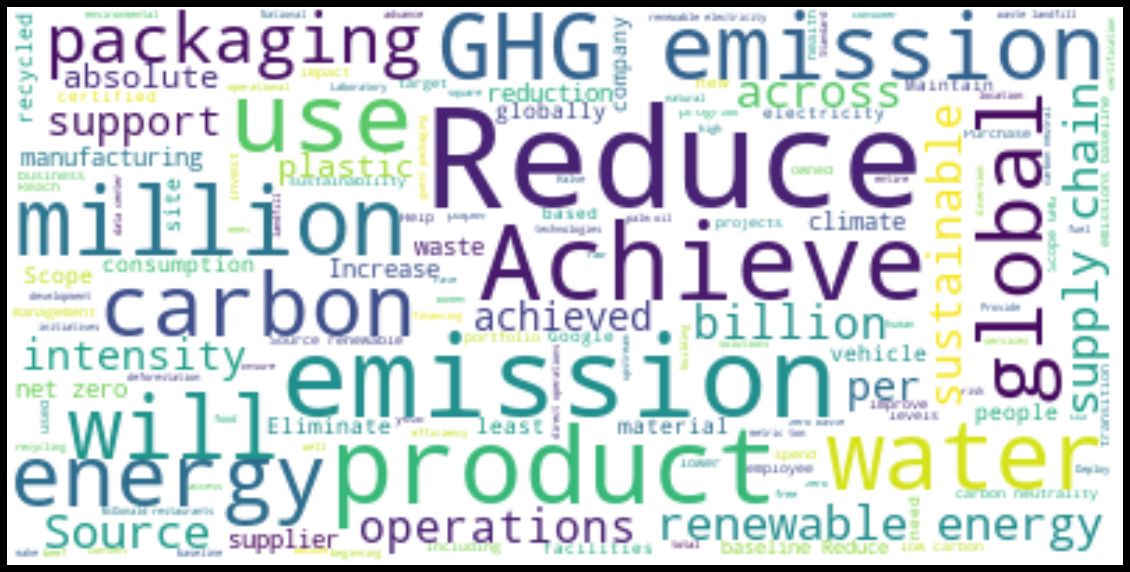

In [48]:
create_wordcloud(data['Sustainability Goals'])

While reporting theri actions for the past year, companies tend to emphasize on words like **achieved**, **reduced** and the amount of money they have spent like millions and billions. Companies do not tend to focus on emphasizing on the real actions they have done, but tend to focus more on the amounts they have spent. This is evident from the fact that there is not a single buzzword related to sustainability that is bolder in the wordcloud. This is one of the reasons why companies actions have gone unnoticed by public

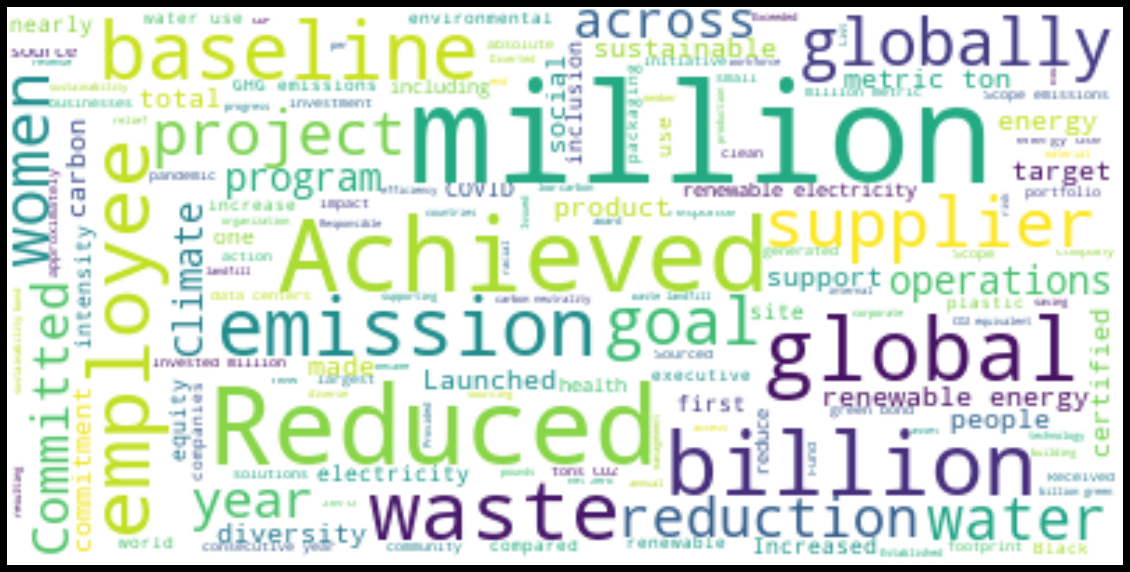

In [49]:
create_wordcloud(data['Sustainability Report Highlights'])

# **Company Specific goals**
Below we can get an high level overview of company specific goals in the form of wordcloud.

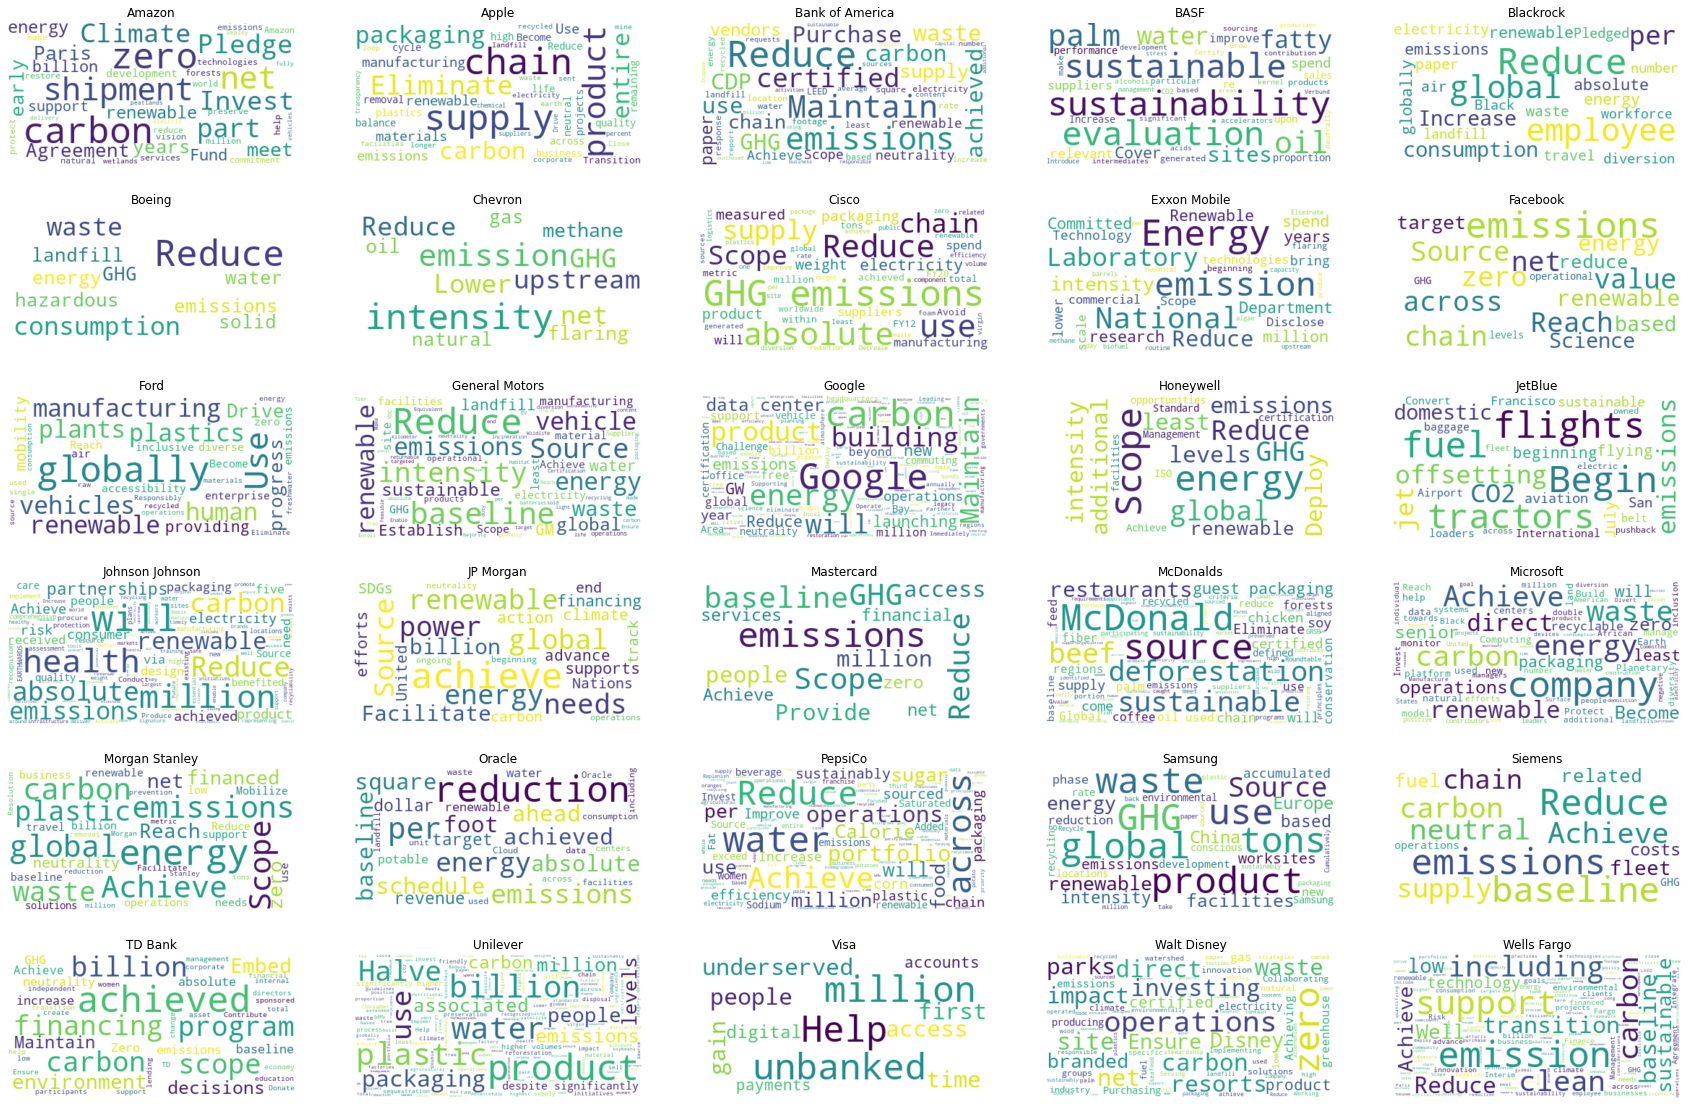

In [59]:
fig = plt.figure(figsize=(30,20))
for i in range(len(data['Sustainability Goals'])):
  text = data['Sustainability Goals'][i]
  wordcloud = WordCloud(max_font_size=50,stopwords = STOPWORDS, max_words=200, background_color="white").generate(text)

  # Display the generated image:
  ax = fig.add_subplot(6,5,i+1)
  ax.set_title(data['Company'][i])
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.axis("off")

fig.savefig('company_goals.png')

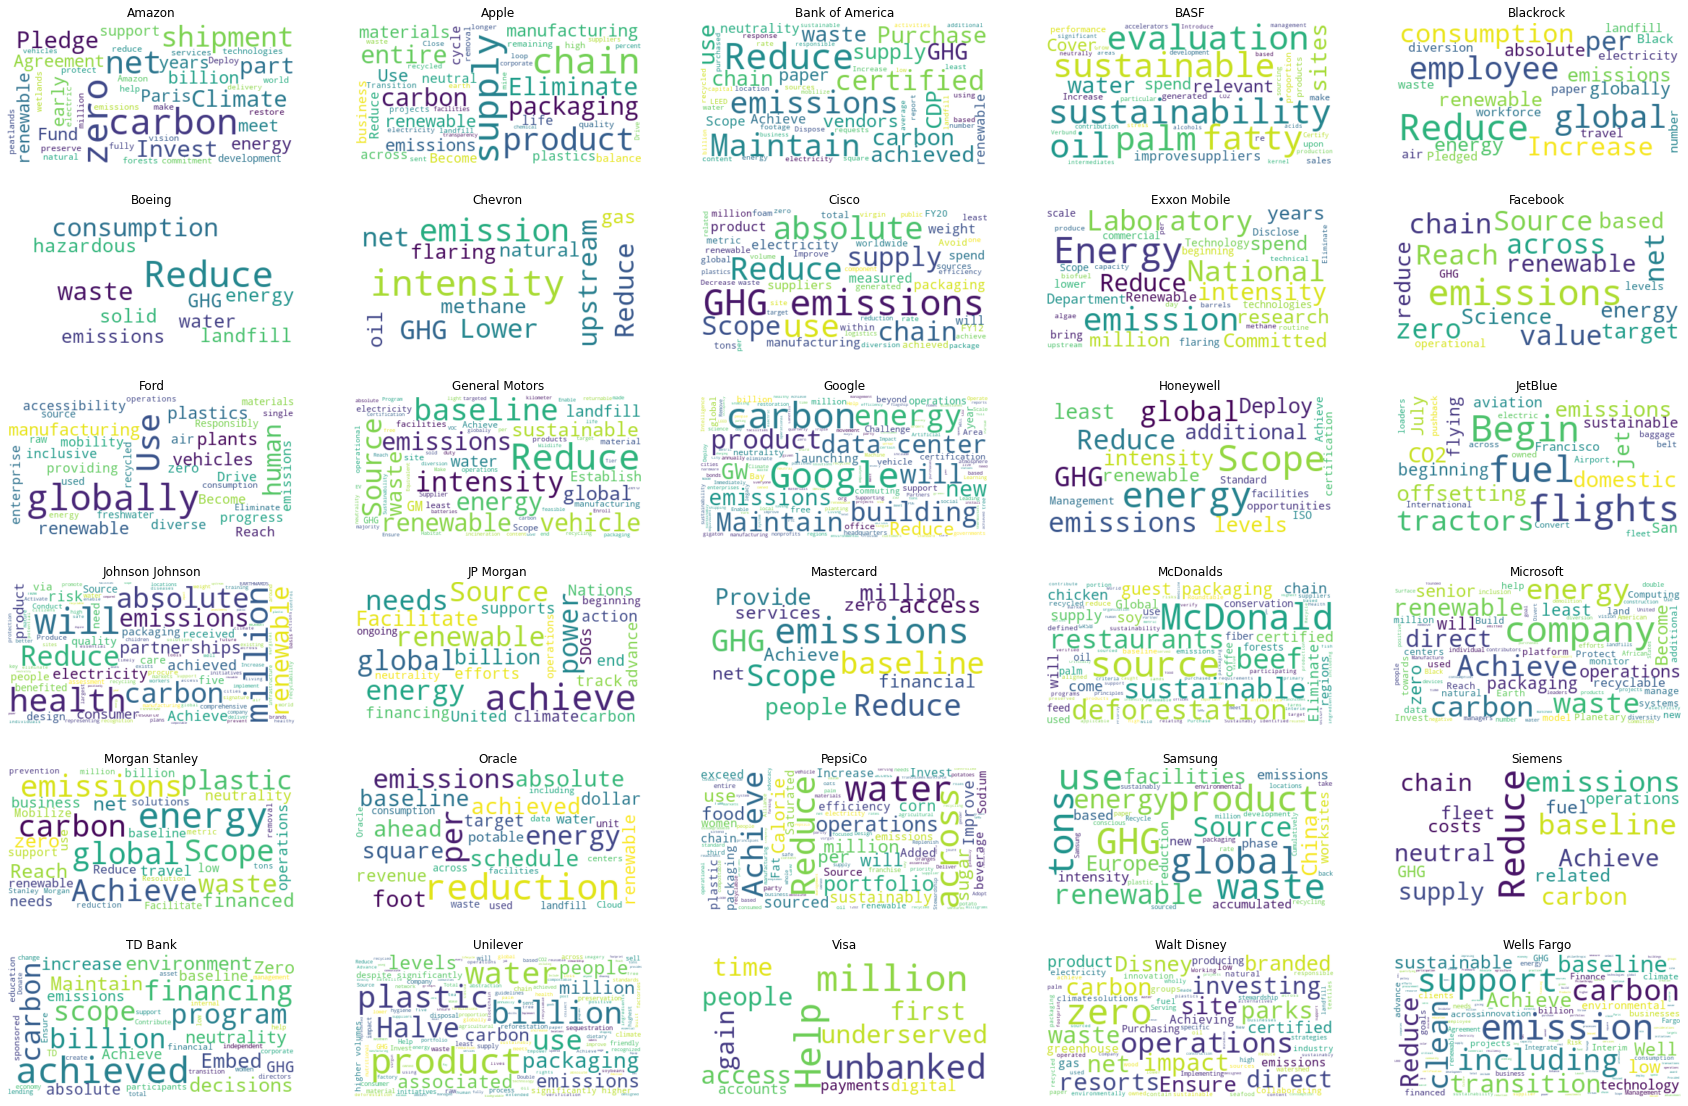

In [58]:
fig = plt.figure(figsize=(30,20))
for i in range(len(data['Sustainability Report Highlights'])):
  text = data['Sustainability Goals'][i]
  wordcloud = WordCloud(max_font_size=50,stopwords = STOPWORDS, max_words=200, background_color="white").generate(text)

  # Display the generated image:
  ax = fig.add_subplot(6,5,i+1)
  ax.set_title(data['Company'][i])
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.axis("off")
fig.savefig('company_actions.png')  